In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()

df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
# Creating df_jobs DataFrame
df_jobs = pd.DataFrame({
    "job_id": [1, 2, 3, 4, 5],
    "job_title": ["Data Scientist", "Software Engineer", "Product Manager", "Marketing Director", "HR Manager"],
    "company_name": ["Google", "Microsoft", "Apple", "Nike", "Starbucks"],
    "job_location": ["Mountain View, CA", "Redmond, WA", "Cupertino, CA", "Beaverton, OR", "Seattle, WA"]
})

# Creating df_companies DataFrame
df_companies = pd.DataFrame({
    "company_name": ["Google", "Microsoft", "Apple", "Nike", "Starbucks"],
    "industry": ["Technology", "Technology", "Technology", "Apparel", "Food & Beverage"],
    "company_size": ["100,000+", "100,000+", "100,000+", "75,000+", "346,000+"]
})

In [3]:
# The merge() function in pandas is used to combine two DataFrames based on a common column.

# Syntax: 
# pd.merge(left_dataframe, right_dataframe, how="join_type", on="common_column")

# Join Types:
# 1. "inner"  -> Keeps only matching rows from both DataFrames (default).
# 2. "left"   -> Keeps all rows from the left DataFrame and matches from the right.
# 3. "right"  -> Keeps all rows from the right DataFrame and matches from the left.
# 4. "outer"  -> Keeps all rows from both DataFrames, filling missing values with NaN.

In [4]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [5]:
## Makes a new dataframe that has only united states as jobs
df_us = df[df['job_country']=='United States'].copy()

## makes a new column which has job counts w.r.t corresponding month, month is spelled out
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

## Makes a pivot table, that counts number of jobs posted per month
df_us_pivot = df_us.pivot_table(index ='job_posted_month', columns='job_title_short', aggfunc='size')

## Reset the index
df_us_pivot.reset_index(inplace=True)

## Makes a new column which has months in integer form
df_us_pivot['job_posted_month_num'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month


## sort the pivot table w.r.t to months in integer form
df_us_pivot=df_us_pivot.sort_values('job_posted_month_num')

## Sets the index
df_us_pivot = df_us_pivot.set_index('job_posted_month')

## remove the job_posted_month_num column
df_us_pivot = df_us_pivot.drop(columns='job_posted_month_num')
df_us_pivot



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [6]:
## Now we want to merge the above data frame the below dataframe

df_tech_jobs = pd.DataFrame({
    "job_posted_month": [
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ],
    "Front-End Developer": [13619, 11456, 11102, 14037, 12126, 12003, 11914, 11571, 14016, 11419, 13771, 14033],
    "Back-End Developer": [9827, 9116, 8178, 9209, 8864, 8065, 8061, 8191, 8447, 8476, 9034, 9232],
    "Full-Stack Developer": [5108, 7298, 5814, 7232, 6718, 5902, 6839, 7413, 6139, 5026, 5653, 6731],
    "UI/UX Designer": [4348, 4284, 4159, 4220, 4980, 4781, 4344, 4104, 4094, 4389, 4099, 4367]
})




df_tech_jobs=df_tech_jobs.set_index('job_posted_month')


In [7]:
df_tech_jobs



,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [8]:
merged_df = df_us_pivot.merge(df_tech_jobs, on='job_posted_month')
merged_df

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Business Analyst           12 non-null     int64
 1   Cloud Engineer             12 non-null     int64
 2   Data Analyst               12 non-null     int64
 3   Data Engineer              12 non-null     int64
 4   Data Scientist             12 non-null     int64
 5   Machine Learning Engineer  12 non-null     int64
 6   Senior Data Analyst        12 non-null     int64
 7   Senior Data Engineer       12 non-null     int64
 8   Senior Data Scientist      12 non-null     int64
 9   Software Engineer          12 non-null     int64
 10  Front-End Developer        12 non-null     int64
 11  Back-End Developer         12 non-null     int64
 12  Full-Stack Developer       12 non-null     int64
 13  UI/UX Designer             12 non-null     int64
dtypes: int64(14)
memory u

In [10]:
## Now we want to plot top 5 jobs based on counts , of jobs in the year, and see how they trend over time

top5 = (merged_df
        .sum()
        .sort_values(ascending=False)
        .head()
        .index
        .tolist())
top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

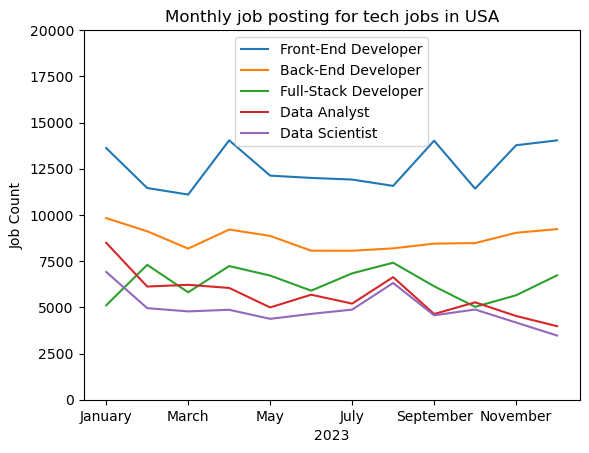

In [11]:
merged_df[top5].plot(kind='line')
plt.title('Monthly job posting for tech jobs in USA')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000) 
plt.legend()
plt.show()